In [135]:
import requests
import pandas as pd
import datetime
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

key = '########################'

['NanumGothic']


In [3]:
start_date = datetime.date(2018,1,1)
end_date = datetime.date(2019,12,31)

In [4]:
day_list = [start_date]
for i in range(1,(end_date - start_date).days + 1):
    day_list.append(start_date + datetime.timedelta(days = i))
print(len(day_list))

730


In [ ]:
box_office_df = pd.DataFrame()
for d in tqdm(day_list):
    d_str = datetime.datetime.strftime(d, format = '%Y%m%d')
    url = "http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key={}&targetDt={}"\
.format(key, d_str)
    res = requests.get(url)
    res = res.json()
    d_df = pd.DataFrame(res['boxOfficeResult']['dailyBoxOfficeList'])
    d_df['date'] = d
    box_office_df = pd.concat([box_office_df, d_df])
    time.sleep(0.1)

In [6]:
box_office_df.to_excel('2017_2018_boxoffice.xls')    

In [7]:
box_office_df.columns

Index(['rnum', 'rank', 'rankInten', 'rankOldAndNew', 'movieCd', 'movieNm',
       'openDt', 'salesAmt', 'salesShare', 'salesInten', 'salesChange',
       'salesAcc', 'audiCnt', 'audiInten', 'audiChange', 'audiAcc', 'scrnCnt',
       'showCnt', 'date'],
      dtype='object')

In [42]:
movie_list = box_office_df[['movieCd','movieNm','openDt']].drop_duplicates().values
#data = []
for cd, name, opendt in tqdm(movie_list[210:]):
    try:
        opendt = opendt.replace('-','')
        url = 'http://www.kobis.or.kr/kobisopenapi/webservice/rest/movie/searchMovieList.json?key={}&movieNm={}&openDt={}'\
        .format(key, name, opendt)
        res = requests.get(url)
        info = res.json()['movieListResult']['movieList'][0]
        data.append([cd, name, opendt, info['nationAlt'], info['genreAlt'], info['repNationNm'], info['repGenreNm']])
    except:
        continue



 20%|████████████████                                                                 | 67/338 [01:04<04:18,  1.05it/s]


 40%|███████████████████████████████▉                                                | 135/338 [02:08<03:17,  1.03it/s]


 60%|████████████████████████████████████████████████                                | 203/338 [03:13<02:10,  1.03it/s]


 80%|████████████████████████████████████████████████████████████████▏               | 271/338 [04:18<01:02,  1.08it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 338/338 [05:22<00:00,  1.05it/s]


In [44]:
movie_df = pd.DataFrame(columns = ['movieCd','movieNm','openDt','국가','장르','대표국가','대표장르'],
                       data = data)
movie_df.to_excel('box_office_movie_repGenre.xlsx')

In [46]:
movie_df['대표장르'].value_counts()

애니메이션     142
드라마       111
액션         70
코미디        37
공포(호러)     26
멜로/로맨스     26
범죄         25
다큐멘터리      24
스릴러        18
판타지        13
기타         12
미스터리       10
어드벤처        9
사극          8
SF          6
가족          5
공연          2
전쟁          2
뮤지컬         1
Name: 대표장르, dtype: int64

In [52]:
df1 = pd.merge(box_office_df,movie_df[['movieCd','대표장르']])

In [53]:
df1.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,date,대표장르
0,1,1,0,OLD,20150976,신과함께-죄와 벌,2017-12-20,7715149100,52.9,-853021100,-10,76065645532,916652,-107305,-10.5,9456147,1644,7957,2018-01-01,판타지
1,1,1,0,OLD,20150976,신과함께-죄와 벌,2017-12-20,2205440800,44.5,-5509708300,-71.4,78271086332,294339,-622313,-67.9,9750486,1446,7019,2018-01-02,판타지
2,1,1,0,OLD,20150976,신과함께-죄와 벌,2017-12-20,1622619700,32.9,-582821100,-26.4,79893706032,215987,-78352,-26.6,9966473,1241,5724,2018-01-03,판타지
3,1,1,0,OLD,20150976,신과함께-죄와 벌,2017-12-20,1629898600,34.5,7278900,0.4,81523604632,217032,1045,0.5,10183505,1226,5525,2018-01-04,판타지
4,1,1,0,OLD,20150976,신과함께-죄와 벌,2017-12-20,2251471243,36.4,621572643,38.1,83775075875,268181,51149,23.6,10451686,1211,5497,2018-01-05,판타지


In [70]:
col_list = list(df1.columns)
col_list.remove('rankOldAndNew')
col_list.remove('openDt')
col_list.remove('movieNm')
col_list.remove('date')
col_list.remove('대표장르')

In [71]:
for col in col_list:
    df1[col] = df1[col].astype('float64')

In [116]:
df1['date'] = pd.to_datetime(df1['date'], format = '%Y-%m-%d')
df2 = df1.groupby(['date','대표장르'])[['audiCnt','scrnCnt','showCnt','salesShare']].sum()
df2 = df2.reset_index()

In [117]:
df2['대표장르'].unique()

array(['다큐멘터리', '드라마', '애니메이션', '액션', '판타지', '코미디', '사극', '공포(호러)', '범죄',
       '어드벤처', 'SF', '멜로/로맨스', '스릴러', '기타', '가족', '미스터리', '뮤지컬', '공연',
       '전쟁'], dtype=object)

In [132]:
def plot_boxoffice_genre(df, genre, col):
    two_year = pd.DataFrame(data = {'date':pd.date_range(datetime.date(2018,1,1), 
                                                         datetime.date(2019,12,31))})
    view = df[df['대표장르'] == genre]
    view = pd.merge(two_year, view, how = 'left')
    view.fillna(0, inplace=True)
    view.set_index('date', inplace=True)
    view[col].plot(figsize = (15,10))
    plt.title('{} _ {}'.format(genre, col))

C:\Users\Public\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Public\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)


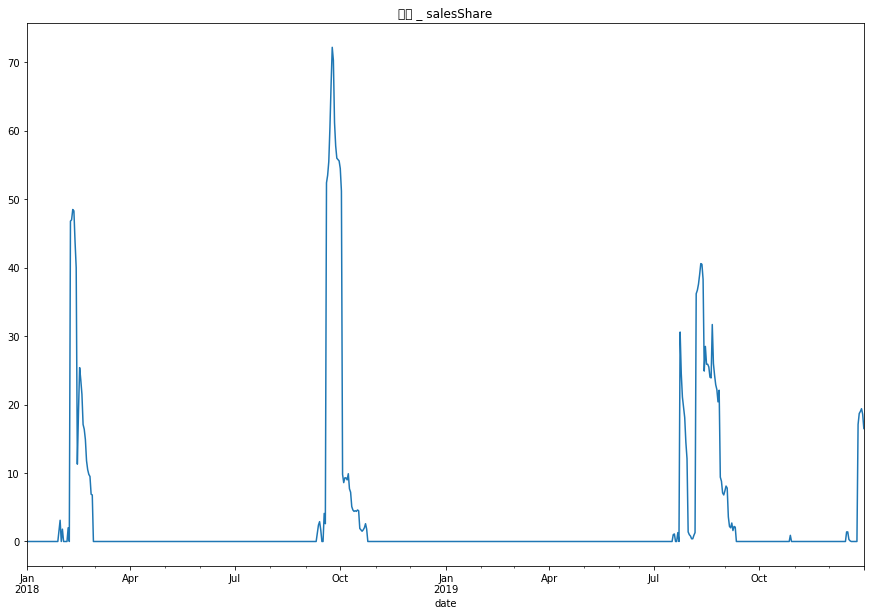

In [140]:
plot_boxoffice_genre(df2, '사극', 'salesShare')